In [3]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

In [5]:
data=load_breast_cancer()
X=data.data
y=data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.25)

In [7]:
xgb_model=XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
)

In [12]:
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
pred_probs=xgb_model.predict_proba(X_test)[:,1]

In [14]:
print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'classification_report: {classification_report(y_test,y_pred)}')


accuracy_score: 0.972027972027972
classification_report:               precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.99      0.97      0.98        87

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



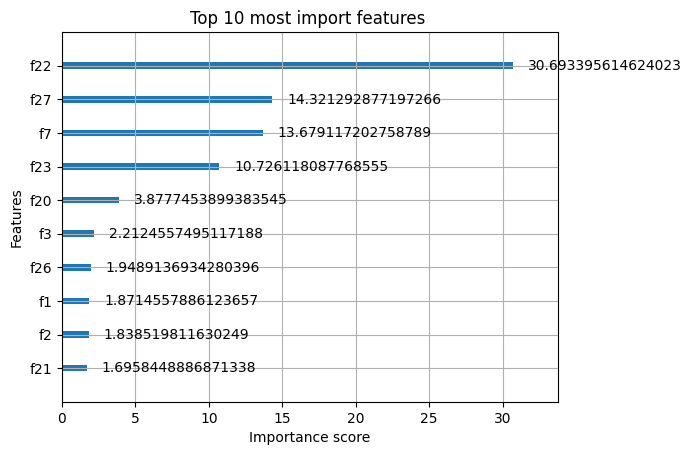

In [16]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 most import features ")
plt.show()
